<a href="https://colab.research.google.com/github/JacksonLeb/tensorflow_learning/blob/main/03_Intro_To_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INtroductino to CNN and Computer Vision

In [1]:
#Getting the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-10 20:54:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 142.251.10.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  29.4MB/s    in 3.6s    

2022-07-10 20:55:01 (29.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories nad {len(filenames)} images in '{dirpath}'")

There are 2 directories nad 0 images in 'pizza_steak'
There are 2 directories nad 0 images in 'pizza_steak/test'
There are 0 directories nad 250 images in 'pizza_steak/test/pizza'
There are 0 directories nad 250 images in 'pizza_steak/test/steak'
There are 2 directories nad 0 images in 'pizza_steak/train'
There are 0 directories nad 750 images in 'pizza_steak/train/pizza'
There are 0 directories nad 750 images in 'pizza_steak/train/steak'


In [4]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

#Visualizing our images


In [5]:
#Getting classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [6]:
#view random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Set up the target directory
  target_folder = target_dir+target_class

  #get random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  #read in image and plot
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {image.shape}") #show us tensor
  return image



['2547797.jpg']
Image shape: (512, 512, 3)


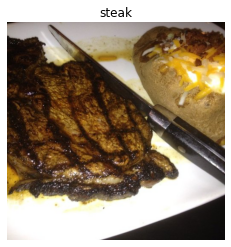

In [7]:
#view ranodm image
img = view_random_image("pizza_steak/train/", "steak")

In [8]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 12,   9,   2],
        [ 14,  11,   4],
        [ 18,  13,   7],
        ...,
        [ 19,  10,   3],
        [ 19,  10,   3],
        [ 18,   9,   2]],

       [[ 18,  14,   5],
        [ 18,  14,   5],
        [ 16,  12,   3],
        ...,
        [ 20,  11,   4],
        [ 20,  11,   4],
        [ 19,  10,   3]],

       [[ 18,  11,   3],
        [ 19,  12,   4],
        [ 21,  14,   6],
        ...,
        [ 21,  12,   5],
        [ 21,  12,   5],
        [ 21,  12,   5]],

       ...,

       [[228, 221, 215],
        [228, 221, 215],
        [229, 222, 216],
        ...,
        [ 11,   9,  10],
        [ 11,   9,  10],
        [ 11,   9,  10]],

       [[228, 221, 215],
        [228, 221, 215],
        [229, 222, 216],
        ...,
        [ 11,   9,  10],
        [ 11,   9,  10],
        [ 11,   9,  10]],

       [[228, 221, 215],
        [228, 221, 215],
        [229, 222, 216],
        ...,
        [ 10,   8,   

In [9]:
#view image shape
img.shape #widht, height, color channels

(512, 512, 3)

In [10]:
img/255.0

array([[[0.04705882, 0.03529412, 0.00784314],
        [0.05490196, 0.04313725, 0.01568627],
        [0.07058824, 0.05098039, 0.02745098],
        ...,
        [0.0745098 , 0.03921569, 0.01176471],
        [0.0745098 , 0.03921569, 0.01176471],
        [0.07058824, 0.03529412, 0.00784314]],

       [[0.07058824, 0.05490196, 0.01960784],
        [0.07058824, 0.05490196, 0.01960784],
        [0.0627451 , 0.04705882, 0.01176471],
        ...,
        [0.07843137, 0.04313725, 0.01568627],
        [0.07843137, 0.04313725, 0.01568627],
        [0.0745098 , 0.03921569, 0.01176471]],

       [[0.07058824, 0.04313725, 0.01176471],
        [0.0745098 , 0.04705882, 0.01568627],
        [0.08235294, 0.05490196, 0.02352941],
        ...,
        [0.08235294, 0.04705882, 0.01960784],
        [0.08235294, 0.04705882, 0.01960784],
        [0.08235294, 0.04705882, 0.01960784]],

       ...,

       [[0.89411765, 0.86666667, 0.84313725],
        [0.89411765, 0.86666667, 0.84313725],
        [0.89803922, 0

#an end-to-end example
##Load images, prerpocess, build CNN, compile CN fit the CNN

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(30)

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#set up paths
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               seed=30)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               seed=30)

#build a CNN
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(244,244,3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),  
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 217ms/step - loss: 0.5937 - accuracy: 0.6533 - val_loss: 0.4161 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4415 - accuracy: 0.8133 - val_loss: 0.3709 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3949 - accuracy: 0.8380 - val_loss: 0.3475 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.2813 - accuracy: 0.8953 - val_loss: 0.3726 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.1963 - accuracy: 0.9240 - val_loss: 0.3968 - val_accuracy: 0.8320


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 116, 116, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 10)       0         
 2D)                                                    

## using the same model as before on new dataset

In [14]:
#Set random seed
tf.random.set_seed(30)

#Create a model to replicate the TensorFlow Playgroun dmodel
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5


InvalidArgumentError: ignored

In [15]:
tf.random.set_seed(30)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(244,244,3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 2.3013 - accuracy: 0.6220 - val_loss: 0.6464 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 1.2446 - accuracy: 0.6720 - val_loss: 0.5352 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6171 - accuracy: 0.7507 - val_loss: 0.5002 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5672 - accuracy: 0.7627 - val_loss: 0.5837 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4361 - accuracy: 0.8167 - val_loss: 0.4625 - val_accuracy: 0.7980


In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 178608)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               17860900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 17,881,201
Trainable params: 17,881,201
Non-trainable params: 0
_________________________________________________________________


#Binary Classification Broken Downn
##Visualize Data
##Preprocess Data - Scaling and Normalizing
##Establish Baseline and create a Model
##Fit the Model
##Evaluate the Model
##Adjust and improve model
##Repeat until satisfied

['203450.jpg']
Image shape: (512, 382, 3)
['1934355.jpg']
Image shape: (384, 512, 3)


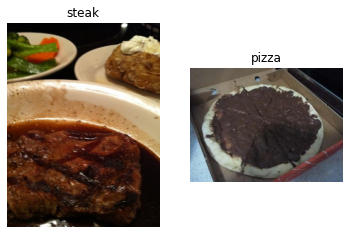

In [17]:
# Visualize Data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

#Preparing to load our Data

In [18]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#turn data into batches

#Advantageous because having a lot of pieces of data, like images, might not fit into memory of GPU/TPU

In [19]:
!nvidia-smi

Sun Jul 10 20:57:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |   2392MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#might not learn very well when seeing everything at the same time

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [21]:
#load in image data nada turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
#get sampel of train dat batch
images, labels = train_data.next()

In [23]:
images, labels

(array([[[[0.07058824, 0.05490196, 0.01960784],
          [0.05490196, 0.03921569, 0.00392157],
          [0.0627451 , 0.03529412, 0.00392157],
          ...,
          [0.07843138, 0.04313726, 0.02352941],
          [0.07843138, 0.04313726, 0.02352941],
          [0.07843138, 0.04313726, 0.01568628]],
 
         [[0.16470589, 0.12941177, 0.09411766],
          [0.24705884, 0.21176472, 0.1764706 ],
          [0.3254902 , 0.28627452, 0.2509804 ],
          ...,
          [0.08235294, 0.04705883, 0.02745098],
          [0.08627451, 0.0509804 , 0.03137255],
          [0.09019608, 0.05490196, 0.02745098]],
 
         [[0.4784314 , 0.42352945, 0.38823533],
          [0.49803925, 0.4431373 , 0.40784317],
          [0.5137255 , 0.45882356, 0.42352945],
          ...,
          [0.08627451, 0.0509804 , 0.03137255],
          [0.09019608, 0.05490196, 0.03529412],
          [0.09019608, 0.05490196, 0.02745098]],
 
         ...,
 
         [[0.9058824 , 0.87843144, 0.854902  ],
          [0.91372

#building baseline CNN model

In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(244,244,3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])



In [25]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [26]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 0.9834 - accuracy: 0.6460 - val_loss: 0.4871 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4480 - accuracy: 0.7907 - val_loss: 0.3846 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3464 - accuracy: 0.8613 - val_loss: 0.3265 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.2546 - accuracy: 0.9027 - val_loss: 0.3159 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.1380 - accuracy: 0.9607 - val_loss: 0.3215 - val_accuracy: 0.8600


#Evaluating model

#plot validationa dn training curves

In [27]:
def plot_loss_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))


  #plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


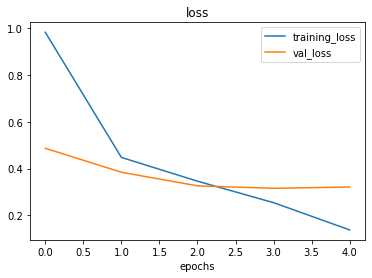

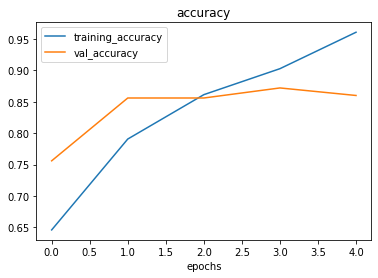

In [28]:
plot_loss_curve(history_4)

#When the validation loss is increasing, it is overfitting on the training dataset

#Adjusting models parameters

##Ways to induce over fitting
###1. Increase num of conv layers
###2. increase the number of conv filters
###3. add another dense laye rto the outpuof of our falttened layer

#Ways to reduce overfitting
##1. Add data augmentaiotn
##2. add regulation layers
##add more pooling layers

In [29]:
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(244,244,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [30]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 0.5809 - accuracy: 0.6953 - val_loss: 0.4400 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4604 - accuracy: 0.7820 - val_loss: 0.3873 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4146 - accuracy: 0.8247 - val_loss: 0.3374 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3824 - accuracy: 0.8387 - val_loss: 0.3256 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3748 - accuracy: 0.8480 - val_loss: 0.3527 - val_accuracy: 0.8420


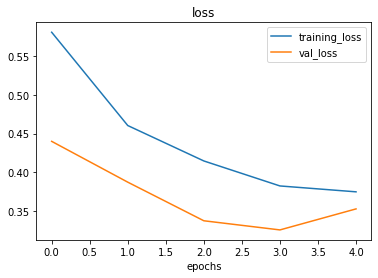

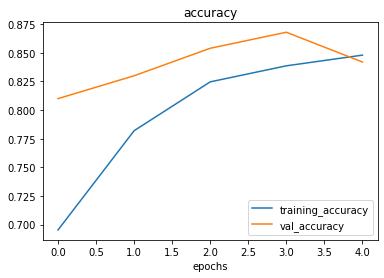

In [31]:
plot_loss_curve(history_5)

In [32]:
#Create ImageDataGenerator training instance with data augmentation
train_data_aug = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True).flow_from_directory(train_dir,target_size=(244,244),batch_size=32,class_mode="binary",shuffle=True)

#Create image generator without data augmentaiotn
train_data = ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir,target_size=(244,244),batch_size=32,class_mode="binary",shuffle=True)

#test data
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,target_size=(244,244),batch_size=32,class_mode="binary",shuffle=True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


#Visualizing our augmented images

In [33]:
#get sample augmented data 
images, labels = train_data.next()
aug_images, aug_labels = train_data_aug.next()

showing image number:10


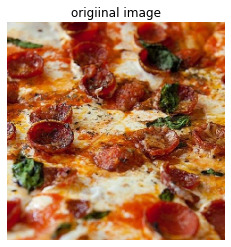

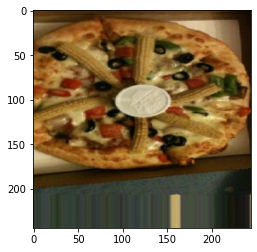

In [34]:
import random
random_number = random.randint(0,32)
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"origiinal image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])

In [35]:
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(244,244,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 540ms/step - loss: 0.6619 - accuracy: 0.6027 - val_loss: 0.6010 - val_accuracy: 0.6340
Epoch 2/5
47/47 [==============================] - 24s 521ms/step - loss: 0.5716 - accuracy: 0.7020 - val_loss: 0.5045 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 24s 517ms/step - loss: 0.5078 - accuracy: 0.7640 - val_loss: 0.3931 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 24s 518ms/step - loss: 0.5034 - accuracy: 0.7667 - val_loss: 0.3693 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 24s 518ms/step - loss: 0.4722 - accuracy: 0.7800 - val_loss: 0.3264 - val_accuracy: 0.8580


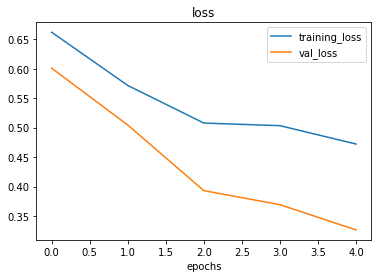

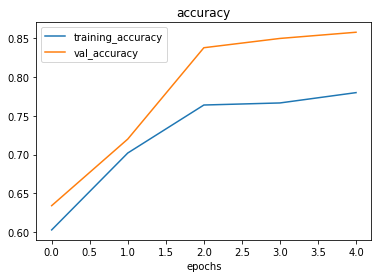

In [36]:
plot_loss_curve(history_6)

#Predictions on Custom Dat

In [37]:
#view example image
print(class_names)

['pizza' 'steak']


--2022-07-10 21:01:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.007s  

2022-07-10 21:01:42 (254 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



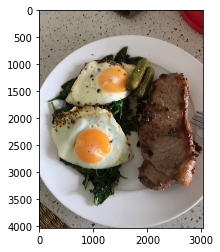

In [38]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)

In [39]:
steak.shape

(4032, 3024, 3)

In [40]:
expanded_steak = tf.expand_dims(steak, axis=0)

#preprocessing image data

In [41]:
def load_and_prep_image(filename, img_shape=244):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [42]:
steak = load_and_prep_image("03-steak.jpeg")

In [43]:
steak

<tf.Tensor: shape=(244, 244, 3), dtype=float32, numpy=
array([[[0.62829334, 0.61260706, 0.5694698 ],
        [0.6673293 , 0.6408105 , 0.5997305 ],
        [0.6288645 , 0.61317825, 0.56611943],
        ...,
        [0.5279978 , 0.05740957, 0.09270369],
        [0.5383952 , 0.07957173, 0.11094428],
        [0.5240058 , 0.07302541, 0.1004764 ]],

       [[0.6354672 , 0.6197809 , 0.57664365],
        [0.6364191 , 0.62073284, 0.573674  ],
        [0.6332691 , 0.6175828 , 0.570524  ],
        ...,
        [0.5269163 , 0.05632809, 0.09162221],
        [0.5549276 , 0.08433936, 0.11963347],
        [0.52707314, 0.06824964, 0.09962219]],

       [[0.6360334 , 0.62034714, 0.5732883 ],
        [0.6626118 , 0.6390824 , 0.59202355],
        [0.65419877, 0.6377974 , 0.5907386 ],
        ...,
        [0.5446726 , 0.07408439, 0.111761  ],
        [0.53613055, 0.07730698, 0.10867953],
        [0.5340747 , 0.06348649, 0.0987806 ]],

       ...,

       [[0.56892025, 0.4865673 , 0.37522048],
        [0.06

In [44]:
model_6.predict(tf.expand_dims(steak, axis=0))

array([[0.7882297]], dtype=float32)

In [45]:
#print image and prediction
pred = model_6.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.7882297]], dtype=float32)

In [46]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [47]:
def pred_and_plot(model, filename, class_names=class_names):
  #import and preprocess image
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

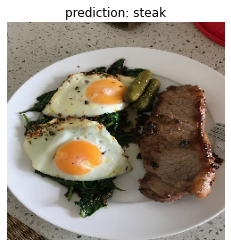

In [48]:
pred_and_plot(model_6, "03-steak.jpeg")

#Multi-Class Image Classification

In [49]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-10 21:01:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  45.8MB/s    in 13s     

2022-07-10 21:01:58 (39.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [50]:
import os
for dirpath, dirnames, filename in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 750 images in 10_food_classes_all_data
There are 10 directories and 750 images in 10_food_classes_all_data/test
There are 0 directories and 750 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/test/steak
There are 0 directories and 750 images in 10_food_classes_all_data/test/hamburger
There are 10 directories and 750 images in

In [51]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [52]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['572384.jpg']
Image shape: (306, 512, 3)


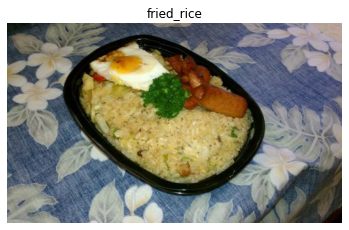

In [53]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [54]:
#Preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#load data from directories, trun in batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               )

test_data = test_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               )

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


###Creating our categorical CNN classification Model

In [57]:
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(244,244,3)),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_7.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 70s 292ms/step - loss: 2.2080 - accuracy: 0.1675 - val_loss: 2.0338 - val_accuracy: 0.2631
Epoch 2/5
235/235 [==============================] - 67s 285ms/step - loss: 1.9794 - accuracy: 0.3017 - val_loss: 1.7541 - val_accuracy: 0.4381
Epoch 3/5
235/235 [==============================] - 73s 313ms/step - loss: 1.5869 - accuracy: 0.4628 - val_loss: 0.9734 - val_accuracy: 0.7429
Epoch 4/5
235/235 [==============================] - 66s 282ms/step - loss: 0.9025 - accuracy: 0.7048 - val_loss: 0.4006 - val_accuracy: 0.9048
Epoch 5/5
235/235 [==============================] - 67s 285ms/step - loss: 0.3316 - accuracy: 0.8977 - val_loss: 0.1345 - val_accuracy: 0.9679


#Evaluate the Model

In [58]:
model_7.evaluate(test_data)

235/235 [==============================] - 38s 161ms/step - loss: 0.1345 - accuracy: 0.9679


[0.13449278473854065, 0.9678666591644287]

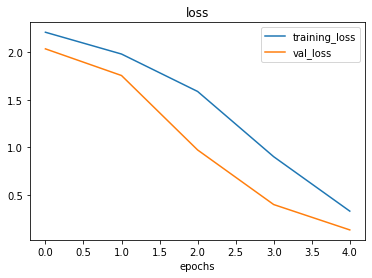

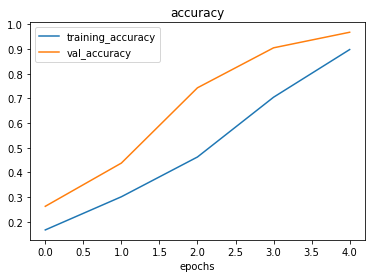

In [60]:
plot_loss_curve(history_7)

In [62]:
#augmented data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(244,244),
                                                                   batch_size=32)

Found 7500 images belonging to 10 classes.


In [65]:
model_9 = tf.keras.models.clone_model(model_7) # clone model without existing weights and biases
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data_augmented,
              epochs=5,
              steps_per_epoch=len(train_data_augmented),
              validation_data=test_data,
              validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 148s 624ms/step - loss: 2.1749 - accuracy: 0.2055 - val_loss: 1.9955 - val_accuracy: 0.2947
Epoch 2/5
235/235 [==============================] - 143s 609ms/step - loss: 2.0299 - accuracy: 0.2899 - val_loss: 1.8811 - val_accuracy: 0.3500
Epoch 3/5
235/235 [==============================] - 144s 612ms/step - loss: 1.9646 - accuracy: 0.3100 - val_loss: 1.8563 - val_accuracy: 0.3599
Epoch 4/5
235/235 [==============================] - 143s 611ms/step - loss: 1.9248 - accuracy: 0.3239 - val_loss: 1.8408 - val_accuracy: 0.3665
Epoch 5/5
235/235 [==============================] - 142s 606ms/step - loss: 1.8935 - accuracy: 0.3500 - val_loss: 1.7510 - val_accuracy: 0.4029


In [66]:
model_7.evaluate(test_data)

235/235 [==============================] - 34s 143ms/step - loss: 0.1345 - accuracy: 0.9679


[0.13449279963970184, 0.9678666591644287]

In [67]:
model_7.save("saved_trained_model_7")

INFO:tensorflow:Assets written to: saved_trained_model_7/assets


In [68]:
loaded_model_7 = tf.keras.models.load_model("saved_trained_model_7")
loaded_model_7.evaluate(test_data)

235/235 [==============================] - 33s 139ms/step - loss: 0.1345 - accuracy: 0.9679


[0.13449285924434662, 0.9678666591644287]